# Bootstrap Evaluation

## Importing

In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import os
import lzma
import dill

from tqdm import tqdm

import cmocean.cm as cm
import salishsea_tools.viz_tools as sa_vi

from scipy import stats as st
import seaborn as sb


## Plotting (regions)

In [6]:
def plot_box(ax, corn, colour):

    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
    [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)
    

## Plotting (histograms)

In [7]:
def plot_hist (name1, variable1, name2, variable2, title, boxnames):

    stats1 = []
    stats2 = []

    fig, axs = plt.subplots(1,len(boxnames), figsize = (20,6), layout='tight')

    for j in range(0, len(boxnames)):

        if j == 0: # So that they appear only once
        
            sb.kdeplot(ax=axs[j], data=variable1[:,j], label=name1)
            stats1.append(scipy.stats.describe(variable1[:,j]))

            sb.kdeplot(ax=axs[j], data=variable2[:,j], label=name2)
            stats2.append(scipy.stats.describe(variable2[:,j]))

        else:

            sb.kdeplot(ax=axs[j], data=variable1[:,j])
            stats1.append(scipy.stats.describe(variable1[:,j]))

            sb.kdeplot(ax=axs[j], data=variable2[:,j])
            stats2.append(scipy.stats.describe(variable2[:,j]))
            
        axs[j].set_title(boxnames[j])

        fig.suptitle(title)
        fig.legend(ncol=2)

    stats1 = np.array(stats1, dtype=object)
    stats2 = np.array(stats2, dtype=object)

    return (stats1,stats2)


## Plotting (boxplots)

In [8]:
def plot_boxplots (name1, variable1, name2, variable2, title, boxnames):

    fig, axs = plt.subplots(1,len(boxnames), figsize = (20,6), layout='tight')

    for j in range(0, len(boxnames)):

        if j == 0: # So that they appear only once

            temp = pd.DataFrame(np.stack((variable1[:,j], variable2[:,j]),axis=1))
            sb.boxplot(ax=axs[j], data=temp)  

        else:
              
            temp = pd.DataFrame(np.stack((variable1[:,j], variable2[:,j]),axis=1))
            sb.boxplot(ax=axs[j], data=temp)    
       
        axs[j].set_title(boxnames[j])

        fig.suptitle(title)
        fig.legend([name1,name2], ncol=2)


## Initiation

In [9]:
name = 'Flagellate'
units = '[mmol m-2]'
category = 'Concentrations'

ds = xr.open_dataset('/data/ibougoudis/MOAD/files/inputs/feb_apr.nc') # Only for plotting the regions


## Regions

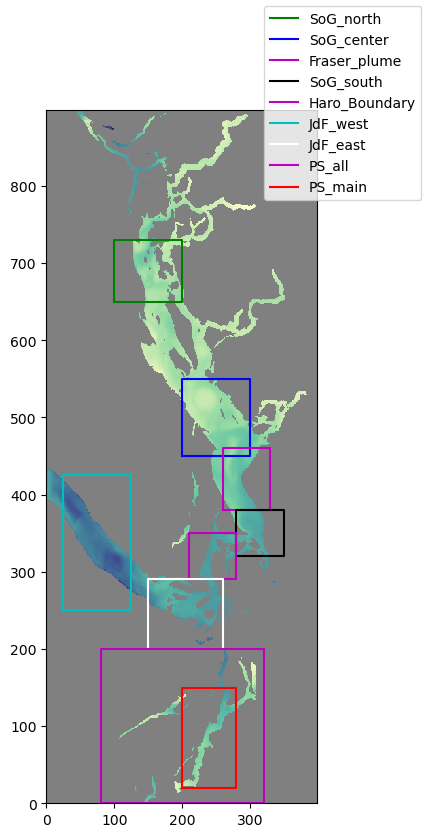

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(ds[name][0], cmap=mycmap)
sa_vi.set_aspect(ax)

SoG_north = [650, 730, 100, 200]
plot_box(ax, SoG_north, 'g')
SoG_center = [450, 550, 200, 300]
plot_box(ax, SoG_center, 'b')
Fraser_plume = [380, 460, 260, 330]
plot_box(ax, Fraser_plume, 'm')
SoG_south = [320, 380, 280, 350]
plot_box(ax, SoG_south, 'k')
Haro_Boundary = [290, 350, 210, 280]
plot_box(ax, Haro_Boundary, 'm')
JdF_west = [250, 425, 25, 125]
plot_box(ax, JdF_west, 'c')
JdF_east = [200, 290, 150, 260]
plot_box(ax, JdF_east, 'w')
PS_all = [0, 200, 80, 320]
plot_box(ax, PS_all, 'm')
PS_main = [20, 150, 200, 280]
plot_box(ax, PS_main, 'r')

boxnames = ['SoG_north','SoG_center','Fraser_plume','SoG_south', 'Haro_Boundary', 'JdF_west', 'JdF_east', 'PS_all', 'PS_main']
fig.legend(boxnames)

boxes = [SoG_north,SoG_center,Fraser_plume,SoG_south,Haro_Boundary,JdF_west,JdF_east,PS_all,PS_main]

regions0 = np.full((len(ds.y),len(ds.x)),np.nan)

for i in range (0, len(boxes)):
    regions0[boxes[i][0]:boxes[i][1], boxes[i][2]:boxes[i][3]] = i

regions0 = xr.DataArray(regions0,dims = ['y','x'])

# # Low resolution

# temp = []

# for i in boxes:
#     temp.append([x//5 for x in i])

# boxes = temp

## Loading

In [12]:
if name == 'Diatom' or name == 'Flagellate':
    path = '/data/ibougoudis/MOAD/files/results/'  + name + '/bootstraps/' + name[0:4].lower() + '_func_reg4_boxes_s14_boot_100/'
else:
    path = '/data/ibougoudis/MOAD/files/results/' + name + '/bootstraps/' + name[0:4].lower() + '_pr_hist1_boxes_8_boot_100/'

with open(path + 'train_metrics.pkl', 'rb') as f:
    train1 = dill.load(f)
with open(path + 'test_metrics.pkl', 'rb') as f:
    test1 = dill.load(f)
with open(path + 'readme.txt', 'r') as f:
    temp = f.read()
    print ('1st run:')
    print(temp)
    print ('\n')
name1 = 'old'

if name == 'Diatom' or name == 'Flagellate':
    path = '/data/ibougoudis/MOAD/files/results/'  + name + '/bootstraps/' + name[0:4].lower() + '_func_reg4_boxes_s25_boot_100/'  
else:
    path = '/data/ibougoudis/MOAD/files/results/' + name + '/bootstraps/' + name[0:4].lower() + '_pr_hist1_boxes_7_boot_100/'

with open(path + 'train_metrics.pkl', 'rb') as f:
    train2 = dill.load(f)
with open(path + 'test_metrics.pkl', 'rb') as f:
    test2 = dill.load(f)
with open(path + 'readme.txt', 'r') as f:
    temp = f.read()
    print('2nd run:')
    print(temp)
    print ('\n')
name2 = 'new dayofyear'


1st run:
name: Flagellate
period: apr_jun
input_features: ['Summation_of_solar_radiation', 'Mean_air_temperature', 'Mean_pressure']
n_intervals: 3
lags: [25, 25, 25, 25, 25, 25, 25, 25, 50]



2nd run:
name: Flagellate
period: apr_jun
input_features: ['Summation_of_solar_radiation', 'Mean_air_temperature', 'Mean_pressure', 'Summation_of_longwave_radiation', 'Mean_wind_speed']
n_intervals: 3
lags: [25, 25, 25, 25, 25, 25, 25, 25, 50]





## Histograms

In [ ]:
r_train1, r_train2 = plot_hist(name1, train1[0], name2, train2[0], 'Correlation Coefficient (Training)', boxnames)
rms_train1, rms_train2 = plot_hist(name1, train1[1], name2, train2[1], 'Root Mean Square Error (Training)', boxnames)
r_train_season1, r_train_season2 = plot_hist(name1, train1[3], name2, train2[3], 'Correlation Coefficient (Training, no seasonality)', boxnames)

r_test1, r_test2 = plot_hist(name1, test1[0], name2, test2[0], 'Correlation Coefficient (Testing)', boxnames)
rms_test1, rms_test2 = plot_hist(name1, test1[1], name2, test2[1], 'Root Mean Square Error (Testing)', boxnames)
r_test_season1, r_test_season2 = plot_hist(name1, test1[3], name2, test2[3], 'Correlation Coefficient (Testing, no seasonality)', boxnames)
spatial_error_test1, spatial_error_test2 = plot_hist(name1, test1[5], name2, test2[5], 'Spatial Error (Testing)', boxnames)


## Boxplots

In [ ]:
plot_boxplots(name1, train1[0], name2, train2[0], 'Correlation Coefficient (Training)', boxnames)
plot_boxplots(name1, train1[1], name2, train2[1], 'Root Mean Square Error (Training)', boxnames)
plot_boxplots(name1, train1[3], name2, train2[3], 'Correlation Coefficient (Training, no seasonality)', boxnames)

plot_boxplots(name1, test1[0], name2, test2[0], 'Correlation Coefficient (Testing)', boxnames)
plot_boxplots(name1, test1[1], name2, test2[1], 'Root Mean Square Error (Testing)', boxnames)
plot_boxplots(name1, test1[3], name2, test2[3], 'Correlation Coefficient (Testing, no seasonality)', boxnames)
plot_boxplots(name1, test1[5], name2, test2[5], 'Spatial Error (Testing)', boxnames)


## T-Test

In [ ]:
def statistic(x, y, a=0):
    return np.mean(x, axis=a) - np.mean(y, axis=a)

In [ ]:
p_values_train = []
train_names = ['Correlation Coefficient (Training)', 'Root Mean Square Error (Training)', 'Slope of the Best Fitting Line (Training)', 
    'Correlation Coefficient (Training, no seasonality)', 'Slope of the Best Fitting Line (Training, no seasonality)']

p_values_test = []
test_names = ['Correlation Coefficient (Testing)', 'Root Mean Square Error (Testing)', 'Slope of the Best Fitting Line (Testing)', 
    'Correlation Coefficient (Testing, no seasonality)', 'Slope of the Best Fitting Line (Testing, no seasonality)', 'Spatial Error (Testing)']

for i in range (0, len(train1)):

    res = st.permutation_test((train1[i], train2[i]), statistic, alternative='two-sided')
    p_values_train.append(res.pvalue)
    
    res = st.permutation_test((test1[i], test2[i]), statistic, alternative='two-sided')
    p_values_test.append(res.pvalue)

# One more criterion
res = st.permutation_test((test1[-1], test2[-1]), statistic, alternative='two-sided')
p_values_test.append(res.pvalue)

p_values_train = np.array(p_values_train)
p_values_test = np.array(p_values_test)

train = np.argwhere(p_values_train < 0.05)

if train.shape[0]==0:
    print('There are no significant differences for training')
elif train.shape[0]==45:
    print ('All are significantly different for training')
else:
    for pair in train:
        print ('The '+ train_names[pair[0]] + ' for ' + boxnames[pair[1]] + ' is significantly different')

print ('\n')

test = np.argwhere(p_values_test < 0.05)

if test.shape[0]==0:
    print('There are no significant differences for testing')
elif test.shape[0]==54:
    print ('All are significantly different for testing')
else:
    for pair in test:
        print ('The '+ test_names[pair[0]] + ' for ' + boxnames[pair[1]] + ' is significantly different')
        

## Printing

In [ ]:
temp = pd.DataFrame([r_train1[:,2],r_train2[:,2]],columns=boxnames,index=[name1,name2])
temp = temp.style.set_caption('Correlation Coefficient (Training)')
display(temp)

In [ ]:
temp = pd.DataFrame([r_test1[:,3],r_test2[:,3]],columns=boxnames,index=[name1,name2])
temp = temp.style.set_caption('Correlation Coefficient (Testing)')
display(temp)